In [21]:
import json
import matplotlib.pyplot as plt
import numpy as np

save_file = "./raw_result.jsonl"
with open(save_file, "r") as f:
    raw_result = [json.loads(line) for line in f.readlines()]

# change the format of raw_result to pandas.DataFrame
import pandas as pd
raw_result_df = pd.DataFrame(raw_result)
print(raw_result_df.head())

# sort the dataframe by the column "acc_davincii"
raw_result_df = raw_result_df.sort_values(by="acc_prune", ascending=False)

                   relation  acc_davincii  acc_vanilla   acc_loo  \
0   applies_to_jurisdiction      0.744706     0.671450  0.681635   
1                    author      0.369412     0.609259  0.669282   
2            award_received      0.114118     0.138148  0.146123   
3  basic_form_of_government      0.258824     0.113333  0.114826   
4                   capital      0.656471     0.675926  0.688646   

   acc_reweight  acc_prune  
0      0.714790   0.719352  
1      0.690366   0.714051  
2      0.161943   0.166493  
3      0.126412   0.140880  
4      0.706542   0.714213  


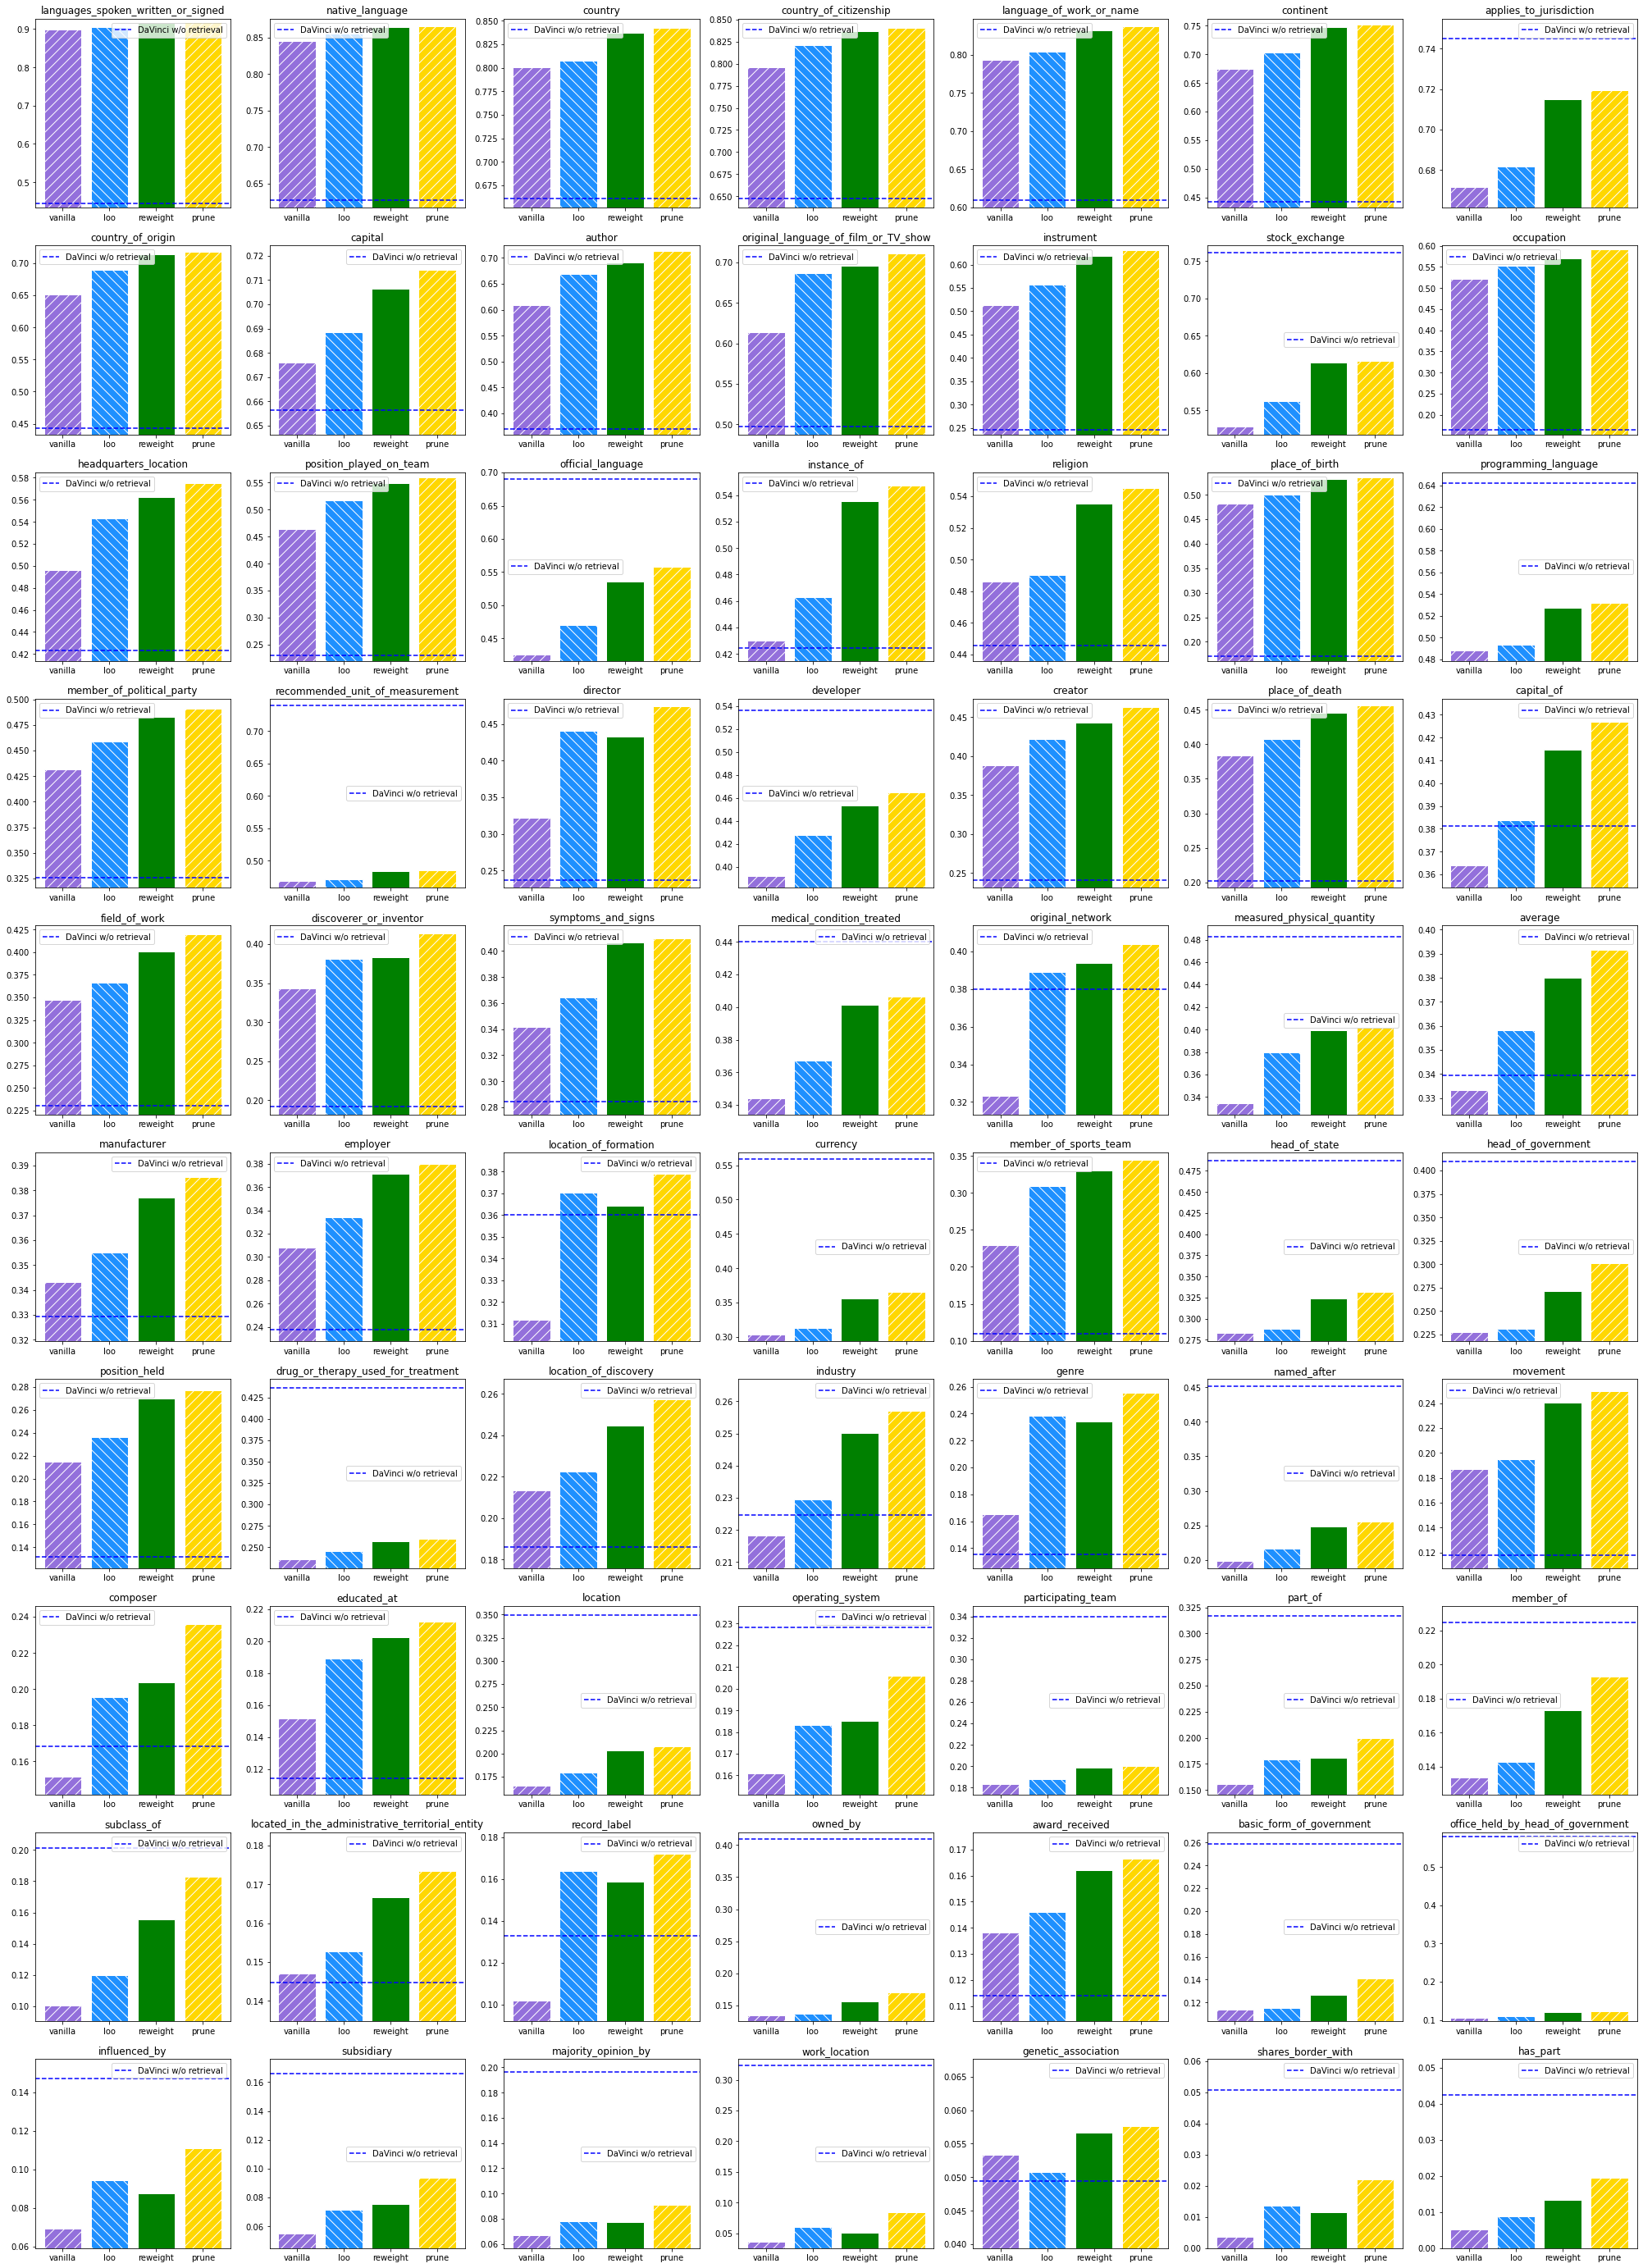

In [26]:
num_relation = 70
relation = raw_result_df["relation"][:num_relation].tolist()
acc_davincii = raw_result_df["acc_davincii"][:num_relation].tolist()
acc_vanilla = raw_result_df["acc_vanilla"][:num_relation].tolist()
acc_loo = raw_result_df["acc_loo"][:num_relation].tolist()
acc_reweight = raw_result_df["acc_reweight"][:num_relation].tolist()
acc_prune = raw_result_df["acc_prune"][:num_relation].tolist()

patterns = ['//', '\\\\', '', '//', "\\", '+', '\\\\', 'x', '++']
color = [ "mediumpurple", "dodgerblue", "green","gold","darkorange", "darkcyan", "darkmagenta", "darkgoldenrod", "darkslategray", "darkviolet"]

fig, axs = plt.subplots(10, 7, figsize=(35, 50))
for i in range(10):
    for j in range(7):
        index = i*7+j

        x = ["vanilla", "loo", "reweight", "prune"]
        y = [acc_vanilla[index], acc_loo[index], acc_reweight[index], acc_prune[index]]

        values = [acc_davincii[index], acc_vanilla[index], acc_loo[index], acc_reweight[index], acc_prune[index]]
        minn = max(min(values)-0.01, 0.0)
        maxx = min(max(values)+0.01, 1.0)
        axs[i, j].set_ylim([minn, maxx])

        axs[i, j].bar(x, y, color = color[:4], hatch = patterns[:4], edgecolor='white')
        axs[i, j].set_title(relation[index])
        axs[i, j].axhline(y=acc_davincii[index], color='b', linestyle='--',label="DaVinci w/o retrieval")
        axs[i, j].legend(["DaVinci w/o retrieval"])
plt.savefig("./results.jpg", dpi=200, bbox_inches="tight")
plt.show()